# 第03讲 向量的四则运算

<font color="blue">作者：欧新宇（Xinyu OU）</font>

<font color="red">本文档所展示的测试结果，均运行于：Intel Core i7-7700K CPU 4.2GHz</font>

---

## 1. 向量的加法

要进行**向量相加**，前提是两个向量具有相同的形态（即 $a.shape = b.shape$）。向量的加法可以理解为两个向量对应元素的相加（按位相加），生成的结果向量维度保持不变（即$(a+b).shape = a.shape = b.shape$）。

给定两个 $n$ 维向量 ***u*** 和 ***v*** ，它们的加法运算规则可以表示为：

$\begin{bmatrix} u_1 \\ u_2 \\ u_3 \\ ... \\ u_n \end{bmatrix}+
\begin{bmatrix} v_1 \\ v_2 \\ v_3 \\ ... \\ v_n \end{bmatrix}=
\begin{bmatrix} u_1+v_1 \\ u_2+v_2 \\ u_3+v_3 \\ ... \\ u_n+v_n \end{bmatrix}$

向量加法的规则非常简单，下面给出一个例子.

**【例1】** 求解向量 $u = \begin{bmatrix} 1 \\ 2 \\ 3 \\ 4 \end{bmatrix}$ 和 $v = \begin{bmatrix} 5 \\ 6 \\ 7 \\ 8 \end{bmatrix}$ 的**和**的运算结果。

按照运算规则可以表示为：

$u+v=
\begin{bmatrix} 1 \\ 2 \\ 3 \\ 4 \end{bmatrix}+
\begin{bmatrix} 5 \\ 6 \\ 7 \\ 8 \end{bmatrix}=
\begin{bmatrix} 1+5 \\ 2+6 \\ 3+7 \\ 4+8 \end{bmatrix}=
\begin{bmatrix} 6 \\ 8 \\ 10 \\ 12 \end{bmatrix}$

使用Python语言可以描述为：

In [1]:
import numpy as np
u = np.array([[1,2,3,4]]).T
v = np.array([[5,6,7,8]]).T
w = u + v

print('u={}\n\n v={}\n\n u+v={}'.format(u,v,w))

u=[[1]
 [2]
 [3]
 [4]]

 v=[[5]
 [6]
 [7]
 [8]]

 u+v=[[ 6]
 [ 8]
 [10]
 [12]]


对于`形态为` $1 \times n$ `的单行矩阵`和`行向量`的相加，也遵循**按位相加**的原则。

- 单行矩阵

In [2]:
import numpy as np
u = np.array([[1,2,3,4]])
v = np.array([[5,6,7,8]])
w = u + v

print('u={}\n\n v={}\n\n u+v={}'.format(u,v,w))

u=[[1 2 3 4]]

 v=[[5 6 7 8]]

 u+v=[[ 6  8 10 12]]


- 行向量

In [3]:
import numpy as np
u = np.array([1,2,3,4])
v = np.array([5,6,7,8])
w = u + v

print('u={}\n\n v={}\n\n u+v={}'.format(u,v,w))

u=[1 2 3 4]

 v=[5 6 7 8]

 u+v=[ 6  8 10 12]


## 2. 向量的数乘

**向量**的`数乘`，又称为向量的`数量乘法`，它表示的是一个`标量`和一个`向量`之间的乘积关系。与向量的加法类似，向量的数乘是由标量和向量中的**每个元素**依次相乘，生成的新向量与原来的向量具有`相同的形态`。向量的数乘从`几何`意义上来说，可以理解为向量沿着所在直线的方向拉升相应的倍数，拉升的**倍数**由`标量`决定，拉升的**方向**与原向量`方向`保持不变。

- 下面给出向量数乘的的几何示意图。

<Figure size 432x288 with 0 Axes>

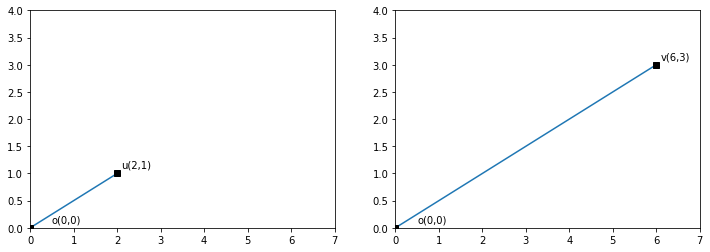

In [4]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from pylab import subplot

fig = plt.figure()

# Make the direction data for the arrows
o = np.array([0,0]) # 向量的起点坐标
u = np.array([2,1]) # 向量A的终点
v = 3*u # 向量B的终点

plt.figure(figsize=(12,4))

subplot(121)
plt.xlim(0,7)
plt.ylim(0,4)
plt.plot([o[0], u[0]], [o[1], u[1]])
plt.plot(o[0], o[1], 'ks')
plt.plot(u[0], u[1], 'ks')
plt.annotate('o(0,0)', xy = o, xytext = ([0.5, 0.1]))
plt.annotate('u(2,1)', xy = u, xytext = ([u[0]+0.1, u[1]+0.1]))

subplot(122)
plt.xlim(0,7)
plt.ylim(0,4)
plt.plot([o[0], v[0]], [o[1], v[1]])
plt.plot(o[0], o[1], 'ks')
plt.plot(v[0], v[1], 'ks')
plt.annotate('o(0,0)', xy = o, xytext = ([0.5, 0.1]))
plt.annotate('v(6,3)', xy = v, xytext = ([v[0]+0.1, v[1]+0.1]))

plt.show()

**【结果分析】**

从上图可以看到向量 $u$ 和 向量 $v=3*u$ 的几何示意图，两个向量具有相同的方向，但具有不同的长度。向量 $v=3*u$ 的长度刚好是向量 $u$ 的3倍。 

---

给定一个 $n$ 维向量 $u$ 和一个标量 *v*，它们的数乘变换运算规则可以表示为：

$c*u = c*\begin{bmatrix} u_1 \\ u_2 \\ u_3 \\ ... \\ u_n \end{bmatrix}
= \begin{bmatrix} c*u_1 \\ c*u_2 \\ c*u_3 \\ ... \\ c*u_n \end{bmatrix}$

下面给出一个向量数乘的例子：

**【例2】** 给定标量5和向量$u=\begin{bmatrix} 1 \\ 2 \\ 3 \\ 4 \end{bmatrix}$，可以得到它们的数乘结果为：
$5*u
=5*\begin{bmatrix} 1 \\ 2 \\ 3 \\ 4 \end{bmatrix}
=5*\begin{bmatrix} 5*1 \\ 5*2 \\ 5*3 \\ 5*4 \end{bmatrix}
=\begin{bmatrix} 5 \\ 10 \\ 15 \\ 20 \end{bmatrix}$。

使用Python语言可以描述为：

In [5]:
import numpy as np
u = np.array([[1,2,3,4]]).T
res = 5*u
print(res)

[[ 5]
 [10]
 [15]
 [20]]


**【结果分析】**

向量的数乘是没有方向的，无论左乘还是右乘都具有相同的效果，这意味着 $\vec{u}*v = v*\vec{u}$。这个结论，可以轻松推广到矩阵的数乘。

## 3. 向量间的乘法：内积和外积

向量间的乘法分为内积和外积两种形式，这两种形式具有较大的差异，下面我们依次介绍。

### 3.1 向量间的内积

- 内积的**前提**：两个向量维数相同，长度相同
- 向量内积的**结果**：标量
- 内积的**别称**：点乘
- **运算规则**：对应位置上的元素相乘，然后合并相加

$𝑢·𝑣=\begin{bmatrix} u_1 \\ u_2 \\ u_3 \\ ... \\ u_n \end{bmatrix}·\begin{bmatrix} u_1 \\ u_2 \\ u_3 \\ ... \\ u_n \end{bmatrix}
=𝑣_1 𝑣_1+𝑣_2 𝑣_2+𝑣_3 𝑣_3+... +𝑣_𝑛 𝑣_𝑛$

- 内积的**几何形式**：𝑢·v=|𝑢||𝑣|  𝑐𝑜𝑠⁡𝜃
- 内积的**几何意义**：向量u 在向量v 方向上的投影长度乘以向量v 的模长。
- 内积的**几何表示**：

![Image](http://ouxinyu.cn/Teaching/ComputerMath/Attachments/0203_InnerProduct.png)

**【例3】** 试计算，向量 $𝑢=\begin{bmatrix} 2 \\ 4 \\ 6 \end{bmatrix}$ 与向量 $𝑣=\begin{bmatrix} 1 \\ 3 \\ 5 \end{bmatrix}$ 的内积。

解：
$𝑢·𝑣=
\begin{bmatrix} 2 \\ 4 \\ 6 \end{bmatrix}·
\begin{bmatrix} 1 \\ 3 \\ 5 \end{bmatrix}$
=2*1+4*3+6*5=2+12+30=44


In [6]:
import numpy as np
u = np.array([2,4,6])
v = np.array([1,3,5])
print(np.dot(u,v))

44


**【结果分析】**

向量间的内积要求两个元素必须是向量形式，同时具有相同的形态。这意味，以矩阵形式表示的“向量”无法进行内积运算。


In [7]:
import numpy as np
u = np.array([[2,4,6]])
v = np.array([[1,3,5]])
print(np.dot(u,v))

ValueError: shapes (1,3) and (1,3) not aligned: 3 (dim 1) != 1 (dim 0)

In [ ]:
import numpy as np
u = np.array([[2,4,6]]).T
v = np.array([[1,3,5]]).T
print(np.dot(u,v))

**【结果分析】**

可以看到相同形态的二维矩阵无法进行内积运算，哪怕是行数或列数为1的二维数组。这似乎和前面的运算规则相违背。

若需要使用二维数组表示的**向量**进行内积运算，则要求两个数组具有相同的长度，同时两个数组互为转置。

具体的运算规则将在后面的矩阵乘法中进行解释。

In [ ]:
import numpy as np
u = np.array([[2,4,6]])
v = np.array([[1,3,5]]).T
print(np.dot(u,v))

### 3.2 向量间的外积

- 向量外积的**结果**：标量（二维）、向量（三维以上）
- 外积的**别称**：叉乘、向量积
- 二维平面的**运算规则**：

$𝑢×𝑣=
\begin{bmatrix} 𝑢_1 \\ 𝑢_2 \end{bmatrix}×
\begin{bmatrix} 𝑣_1 \\ 𝑣_2 \end{bmatrix}
=𝑢_1 𝑣_2 − 𝑢_2 𝑣_1$

- 外积的**几何形式**：𝑢×v=|𝑢||𝑣|s𝑖𝑛⁡𝜃
- **几何意义（二维）**：向量u 和向量v 张成的平行四边形的面积。
- **几何表示（二维）** ：

![Image](http://ouxinyu.cn/Teaching/ComputerMath/Attachments/0204_2DOuterProduct.png)

三维平面的运算规则：

$𝑢×𝑣=
\begin{bmatrix} 𝑢_1 \\ 𝑢_2 \\ 𝑢_3 \end{bmatrix}×
\begin{bmatrix} 𝑣_1 \\ 𝑣_2 \\ 𝑣_3 \end{bmatrix}
=\begin{bmatrix} 𝑢_2 𝑣_3 - 𝑢_3 𝑣_2 \\ 𝑢_3 𝑣_1 - 𝑢_1 𝑣_3  \\ 𝑢_1 𝑣_2 - 𝑢_2 𝑣_1 \end{bmatrix}$

- **几何意义（三维）**：向量 𝑢 和向量 𝑣 张成的平面的法向量，该向量垂直于 𝑢 和 𝑣 向量构成的平面。
- **几何表示（三维）** ：

![Image](http://ouxinyu.cn/Teaching/ComputerMath/Attachments/0205_3DOuterProduct.png)

**【例4】** 试计算，向量 $𝑢=\begin{bmatrix} 2 \\ 4 \end{bmatrix}$ 与向量 $𝑣=\begin{bmatrix} 3 \\ 5 \end{bmatrix}$ 的外积。

解：
$𝑢×𝑣=
\begin{bmatrix} 2 \\ 4 \end{bmatrix}·
\begin{bmatrix} 3 \\ 5 \end{bmatrix}$
=2*5 - 4*3 =10-12=-2

In [ ]:
import numpy as np
u = np.array([2,4])
v = np.array([3,5])
print(np.cross(u,v))

**【例5】** 试计算，向量 $𝑢=\begin{bmatrix} 2 \\ 3 \\ 4 \end{bmatrix}$ 与向量 $𝑣=\begin{bmatrix} 1 \\ 3 \\ 6 \end{bmatrix}$ 的外积。

解：
$u×v=
\begin{bmatrix} 2 \\ 3 \\ 4 \end{bmatrix}·
\begin{bmatrix} 1 \\ 3 \\ 6 \end{bmatrix}
=\begin{bmatrix} u_2 v_3 - u_3 v_2 \\ u_3 v_1 - u_1 v_3 \\ u_1 v_2 - u_2 v_1 \end{bmatrix}
=\begin{bmatrix} 3*6-4*3 \\ 4*1-2*6 \\ 2*3-3*1 \end{bmatrix}
=\begin{bmatrix} 6 \\ -8 \\ 3 \end{bmatrix}$

In [ ]:
import numpy as np
u = np.array([2,3,4])
v = np.array([1,3,6])
print(np.cross(u,v))

In [ ]:
import numpy as np
u = np.array([1,1,1])
v = np.array([2,3]).T
print(np.cross(u,v))

## 4. 向量的线性组合

- 向量的**线性组合**：基于向量加法和数乘构建的基本运算。
- 基本**运算规则**：假设存在标量𝑎,𝑏,𝑐 和向量𝒖,𝒗,𝒘 ，则有：

$𝑎𝒖+𝑏𝒗+𝑐𝒘
=𝑎\begin{bmatrix} u_1 \\ u_2 \\ u_3 \end{bmatrix}
+𝑏\begin{bmatrix} v_1 \\ v_2 \\ v_3 \end{bmatrix}
+𝑐\begin{bmatrix} w_1 \\ w_2 \\ w_3 \end{bmatrix}
=\begin{bmatrix} a u_1 + b v_1 + c w_1 \\ a u_2 + b v_2 + c w_2 \\ a u_3 + b v_3 + c w_3 \end{bmatrix}$

**【例6】** 给定标量𝑎=2,𝑏=4,𝑐=6和向量 $𝑢=\begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix},𝒗=\begin{bmatrix} 4 \\ 5 \\ 6 \end{bmatrix},𝒘=\begin{bmatrix} 7 \\ 8 \\ 9 \end{bmatrix}$，试求线性组合 $𝑎𝒖+𝑏𝒗+𝑐𝒘$。

解：
$𝑎𝒖+𝑏𝒗+𝑐𝒘=
2\begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix}+
4\begin{bmatrix} 4 \\ 5 \\ 6 \end{bmatrix}+
6\begin{bmatrix} 7 \\ 8 \\ 9 \end{bmatrix}=
\begin{bmatrix} 2*1+4*4+6*7 \\ 2*2+4*5+6*8 \\ 2*3+4*6+6*9  \end{bmatrix}=
\begin{bmatrix} 60 \\ 72 \\ 84  \end{bmatrix}$

In [ ]:
import numpy as np
u = np.array([[1,2,3]]).T
v = np.array([[4,5,6]]).T
w = np.array([[7,8,9]]).T
print(2*u + 4*v + 6*w)

In [ ]:
import numpy as np
u = np.array([1,2,3]).T
v = np.array([4,5,6]).T
w = np.array([7,8,9]).T
print(2*u + 4*v + 6*w)

**【结果分析】**

向量的线性组合需要将向量转换为列向量，因此需要使用二维数组来表示列向量。直接进行线性变换，可以运算，但无法获得最终的列向量。


In [ ]:
import numpy as np
u = np.array([[1,2]]).T
v = np.array([[2,3]]).T
w = np.array([[3,4]]).T
print(1*u + 3*v + 5*w)

In [ ]:
import numpy as np
u = np.array([1,2,3])
v = np.array([4,5,6])
print(np.cross(u,v))